In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("./house_price_Dống-Da_Hà-Nội_subdata.csv",encoding="unicode_escape")
df.head(7)

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
5,41.0,8900.0,44292,NaN,dong-Nam,NaN,NaN,3.0,7.0,21.012310,105.828978,trong ngo
6,39.0,5280.0,44292,So do,Tay-Nam,NaN,3.0,4.0,4.0,21.021652,105.801041,trong ngo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [ ]:
df.dropna()

In [13]:
df1 = df.drop(labels=['land_certificate','house_direction','balcony_direction','property_type'],axis=1)
df1.head()

,area,price,postDate,toilet,bedroom,floor,lat,long
0,50.0,14700.0,44197,4.0,6.0,6.0,21.015698,105.824583
1,57.0,4200.0,44265,3.0,8.0,4.0,21.025208,105.833111
2,62.0,11000.0,44268,6.0,5.0,6.0,21.025379,105.801011
3,26.0,2900.0,44292,4.0,3.0,4.0,21.014325,105.834918
4,40.0,3950.0,44292,NaN,NaN,5.0,21.009862,105.838083


Xư ly ngoai lai

In [ ]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df1))
# print(z)

In [15]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

area           41.000000
price       17550.000000
postDate      115.000000
toilet          2.250000
bedroom         3.000000
floor           1.000000
lat             0.007683
long            0.007344
dtype: float64


In [16]:
print((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

      area  price  postDate  toilet  bedroom  floor    lat   long
0    False  False     False   False    False  False  False  False
1    False  False     False   False    False  False  False  False
2    False  False     False   False    False  False  False   True
3    False  False     False   False    False  False  False  False
4    False  False     False   False    False  False  False  False
..     ...    ...       ...     ...      ...    ...    ...    ...
666   True  False     False   False    False  False  False  False
667  False  False     False   False    False  False  False  False
668  False  False     False   False    False  False  False  False
669  False  False     False   False    False  False  False  False
670  False  False     False   False    False  False  False  False

[671 rows x 8 columns]


In [19]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà

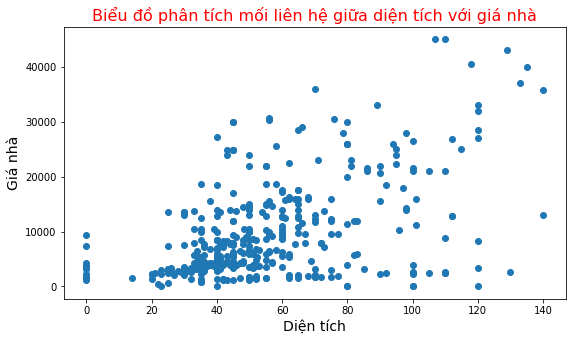

In [20]:
dien_Tich = df2.area
gia_Nha = df2.price

plt.figure(figsize=(9,5))
plt.scatter(dien_Tich, gia_Nha)
plt.title('Biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà', fontsize = 16, color = 'r')
plt.xlabel('Diện tích', fontsize = 14)
plt.ylabel('Giá nhà', fontsize = 14)
plt.show()

Giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.

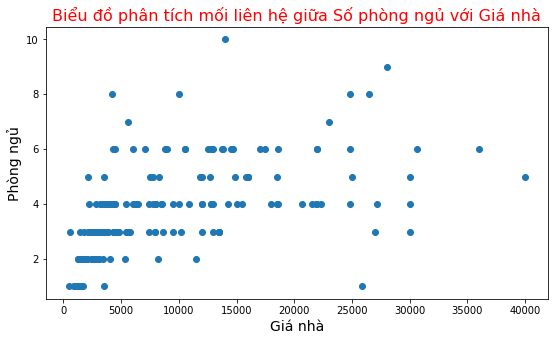

In [21]:
bedroom = df2.bedroom
gia_Nha = df2.price

plt.figure(figsize=(9,5))
plt.scatter(y=bedroom, x=gia_Nha)
plt.title('Biểu đồ phân tích mối liên hệ giữa Số phòng ngủ với Giá nhà', fontsize = 16, color = 'r')
plt.ylabel('Phòng ngủ', fontsize = 14)
plt.xlabel('Giá nhà', fontsize = 14)
plt.show()

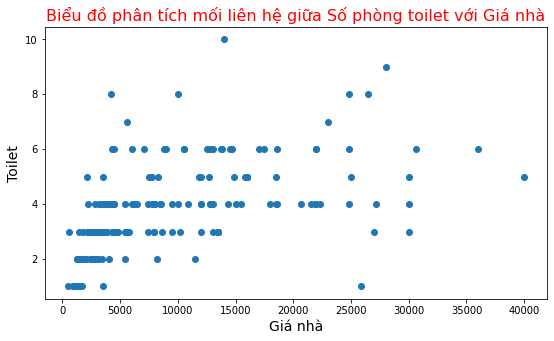

In [22]:
toilet = df2.toilet
gia_Nha = df2.price

plt.figure(figsize=(9,5))
plt.scatter(y=bedroom, x=gia_Nha)
plt.title('Biểu đồ phân tích mối liên hệ giữa Số phòng toilet với Giá nhà', fontsize = 16, color = 'r')
plt.ylabel('Toilet', fontsize = 14)
plt.xlabel('Giá nhà', fontsize = 14)
plt.show()

Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).